In [1]:
import pandas as pd
import numpy as np
import nhandv6_classification as dvn_c
import matplotlib.pyplot as plt
import seaborn as sns

link = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%202/datasets/Mall_Customers.csv"
mall_df = pd.read_csv(link)
mall_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [2]:
dvn_c.table_count_null(mall_df)

CustomerID  Gender    Age Annual Income (k$)  \
column_type             int64  object  int64              int64   
cnt_null_data (nb)          0       0      0                  0   
cnt_null_data (%)         0.0     0.0    0.0                0.0   

                   Spending Score (1-100)  
column_type                         int64  
cnt_null_data (nb)                      0  
cnt_null_data (%)                     0.0

In [3]:
mall_df = dvn_c.data_duplicate(mall_df)

|****************************************************************************************************
|	The initial_shape of your dataset is (200, 5)
|----------------------------------------------------------------------------------------------------
|	Number of duplicated-values = 0, about 0.0% of initial dataset.
|----------------------------------------------------------------------------------------------------
|	Viewing the first 5 rows.
|****************************************************************************************************


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
dvn_c.table_count_unique(mall_df)

CustomerID  \
column_type                                                       int64   
cnt_unique (nb)                                                     200   
most_appeared_value   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
cnt_occurrences (nb)                                                200   
cnt_occurrences (%)                                               100.0   

                        Gender    Age Annual Income (k$)  \
column_type             object  int64              int64   
cnt_unique (nb)              2     51                 64   
most_appeared_value   [Female]   [32]           [54, 78]   
cnt_occurrences (nb)       112     11                 24   
cnt_occurrences (%)       56.0    5.5               12.0   

                     Spending Score (1-100)  
column_type                           int64  
cnt_unique (nb)                          84  
most_appeared_value                    [42]  
cnt_occurrences (nb)                      8  
cnt_occurrences (%)                     4.0

## Viewing

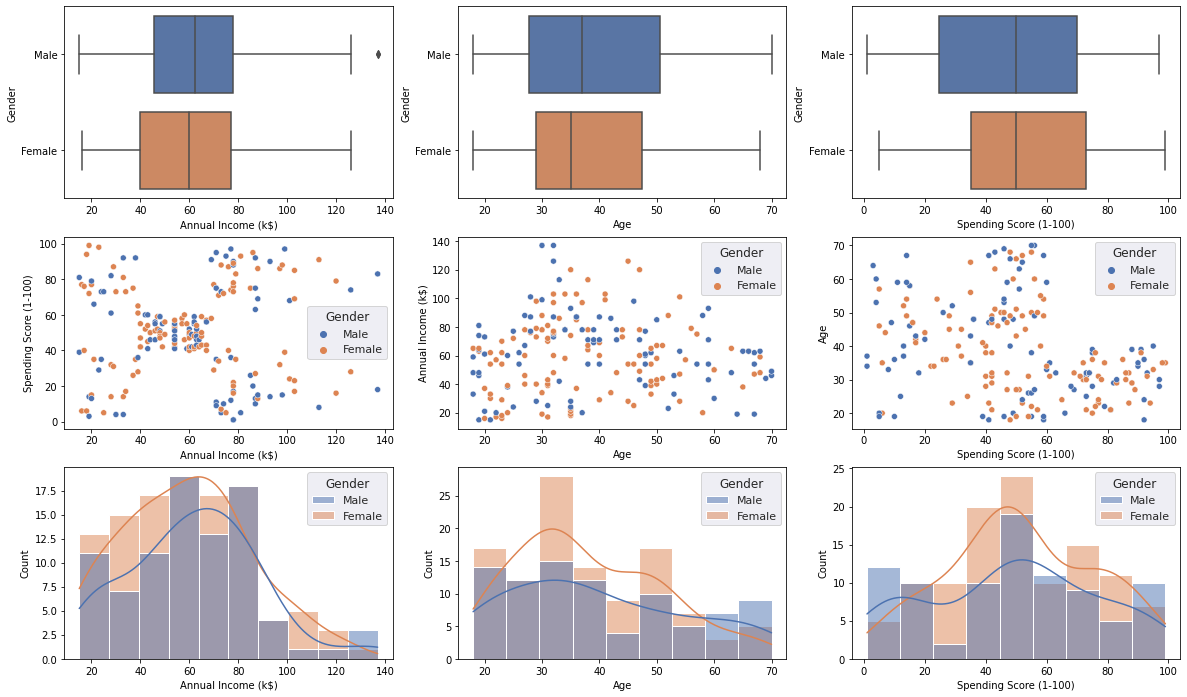

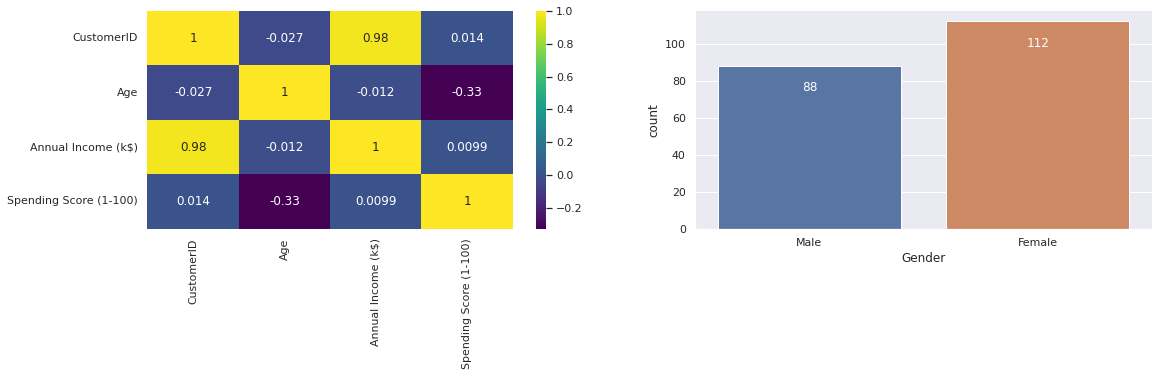

In [5]:
dvn_c.initial_viewing(mall_df, 
                      'Annual Income (k$)', 'Age', 'Gender', 'Spending Score (1-100)')

### Removal outlier / anomallies data-points

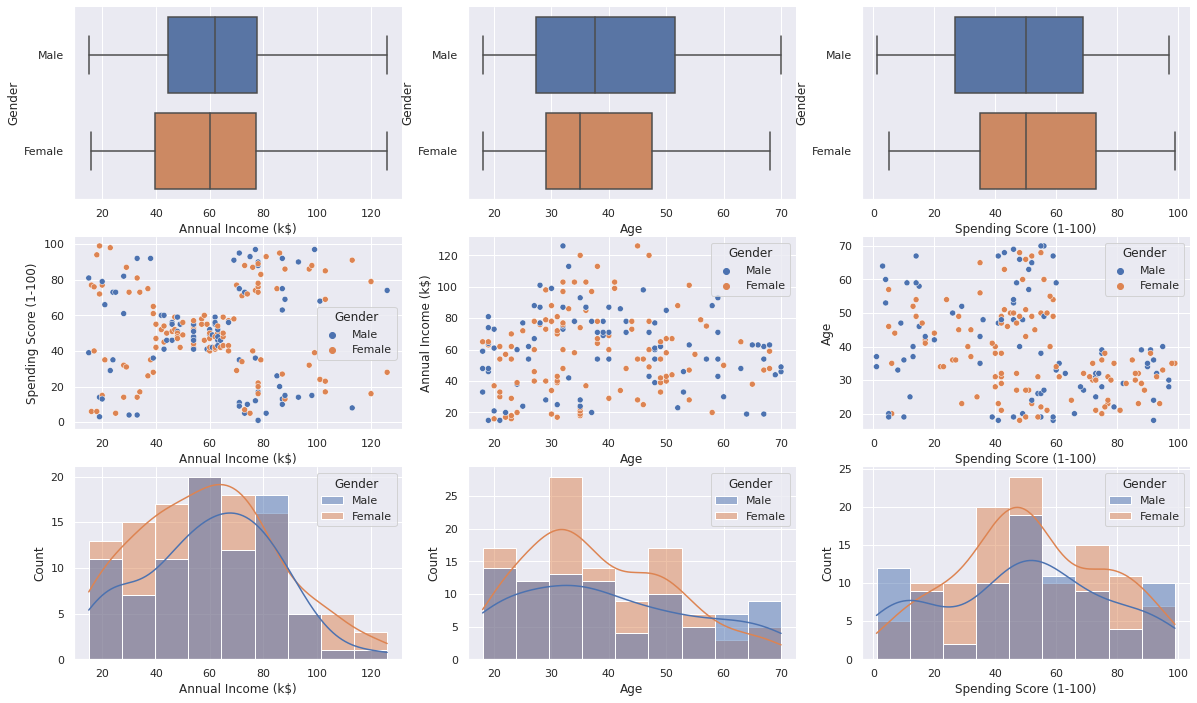

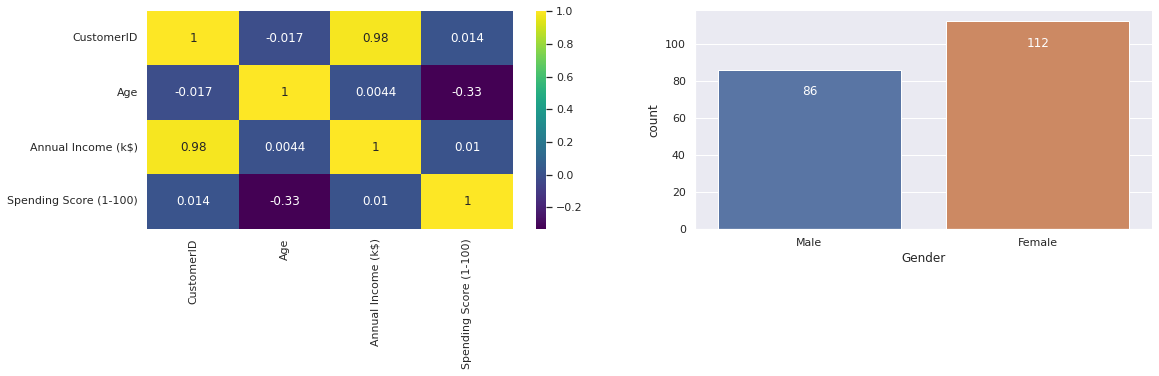

In [6]:
removed_df = dvn_c.anomallies_removed(mall_df, 'Annual Income (k$)')

dvn_c.initial_viewing(removed_df, 
                      'Annual Income (k$)', 'Age', 'Gender', 'Spending Score (1-100)')

### Comments
- We see that ‘Age’ is negatively correlated with ‘Spending Score’.
- ‘Annual Income’ is very less correlated with ‘Age’
- ‘Annual Income’ and ‘Spending Score’ is also very less correlated.
- ‘Gender’ is very less correlated with ‘Spending Score’ but more correlated, when compared to ‘Annual Income’.

### Set-up the clustering-model

In [7]:
data = dvn_c.scaling_data(removed_df, 'CustomerID', [], 'norm')
data.head()

Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                         
1          -1.421809           -1.774673               -0.434887   
2          -1.279124           -1.774673                1.196381   
3          -1.350467           -1.735049               -1.716597   
4          -1.136439           -1.735049                1.041022   
5          -0.565697           -1.695425               -0.396047   

            Gender_is_Female  Gender_is_Male  
CustomerID                                    
1                          0               1  
2                          0               1  
3                          1               0  
4                          1               0  
5                          1               0

### Apply K-Means
First one, I assume that we didn't focus on the gender of customers!

Noting that, we will apply KMeans to find the best number of clusters on the **standardizing-dataset**

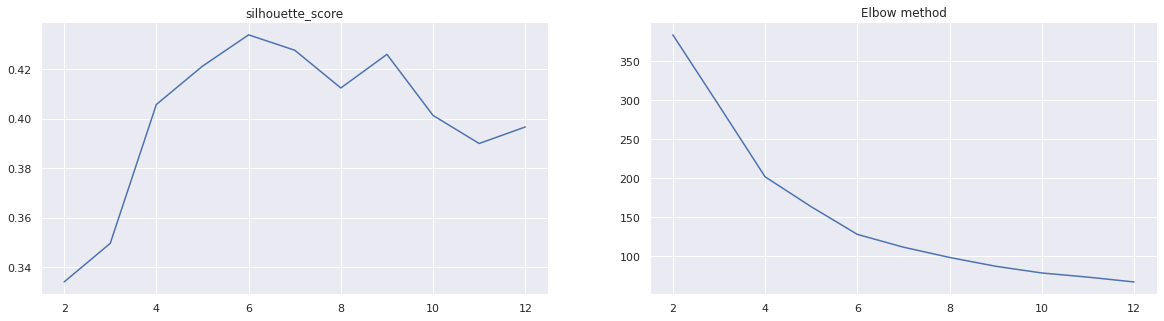

In [8]:
dvn_c.clusters_scored(data.drop(columns = ['Gender_is_Female', 'Gender_is_Male']))

- We can see that the optimal numbers of clusters be 4-6, the points that which `Elbow-score` stops decreasing drastically. Likewise, these points the `shilhoutte_scores` are the best. But the best-one must be $6$.

- Now, we will check these 3 clusters values by viewing these clusters-results.

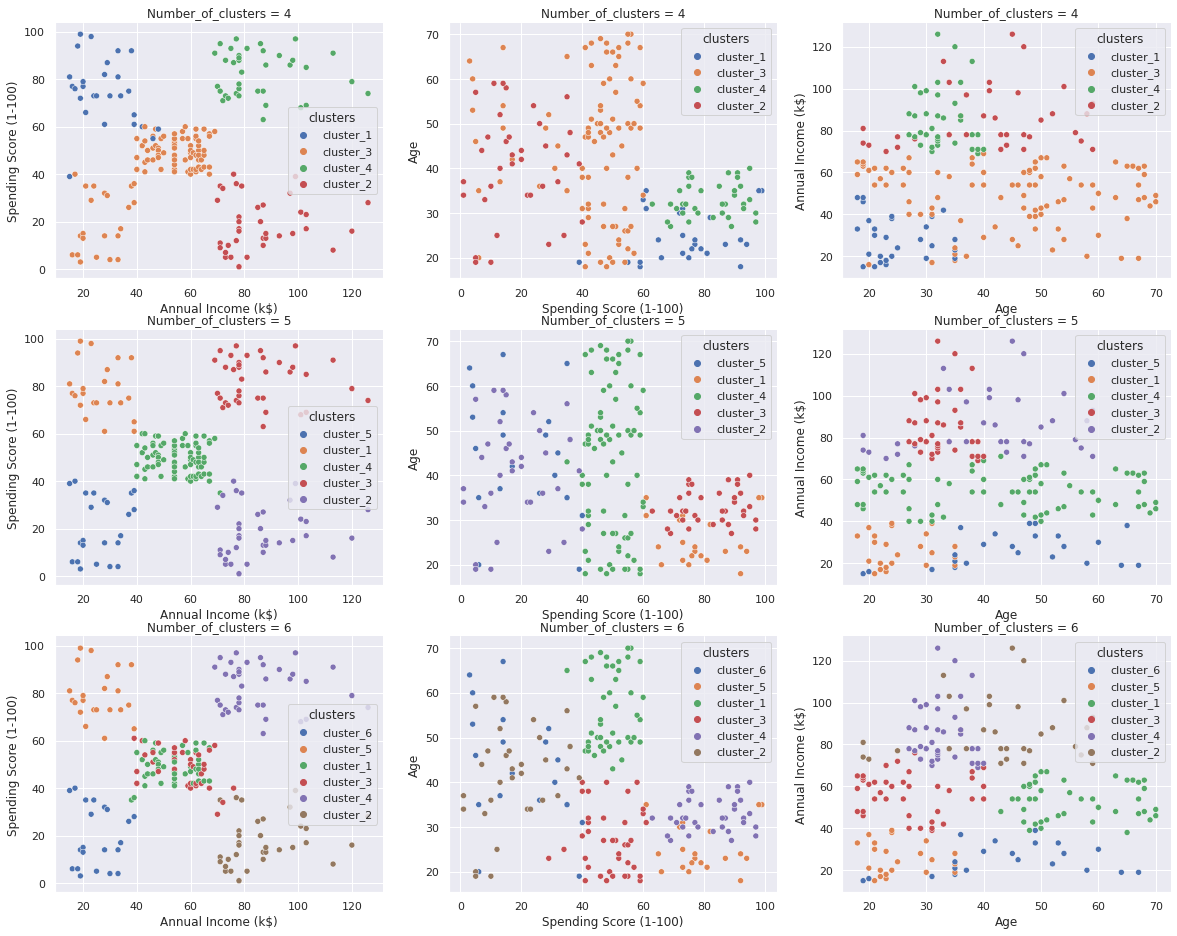

In [9]:
from sklearn.cluster import KMeans
            
dvn_c.cluster_views(removed_df.drop(columns = ['Gender', 'CustomerID']), 
                    [4,5,6], 
                    'Annual Income (k$)', 'Spending Score (1-100)', 'Age')    

### Verify by classification!

#### Create the new_cluster_label in your dataset

Now, let `n_cluster = 5`

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

    clusters  
0  cluster_2  
1  cluster_4  
2  cluster_2  
3  cluster_4  
4  cluster_2

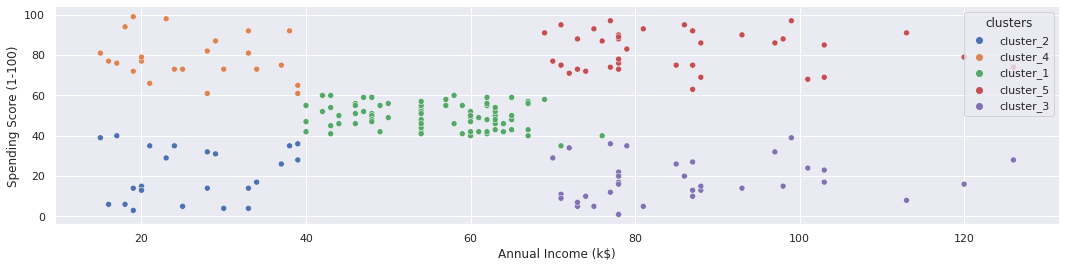

In [10]:
df_add_label = dvn_c.add_labels(removed_df, ['CustomerID', 'Gender'], 5)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                hue = 'clusters', data = df_add_label)
df_add_label.head()

#### Comments
As observed above, the `income` and `spending_score` 

>- `Group 1`: low annual income, low spending score
>- `Group 2`: low annual income, high spending score
>- `Group 3`: intermediate annual income, intermediate spending score
>- `Group 4`: high annual income, high spending score
>- `Group 5`: high annual income, low spending score

#### Apply a simple-classification with `AdaBoost`

Best parameters = {'learning_rate': 0.01, 'n_estimators': 200} 
Trained_time = 0.0 minutes, 12.26 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   cluster_1       0.69      1.00      0.82        20
   cluster_2       1.00      1.00      1.00         6
   cluster_3       0.00      0.00      0.00         9
   cluster_4       1.00      1.00      1.00         6
   cluster_5       1.00      1.00      1.00         9

    accuracy                           0.82        50
   macro avg       0.74      0.80      0.76        50
weighted avg       0.70      0.82      0.75        50

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   cluster_1       1.00      1.00      1.00        19
   cluster_2       1.00      1.00      1.00         6
   cluster_3       1.00      1

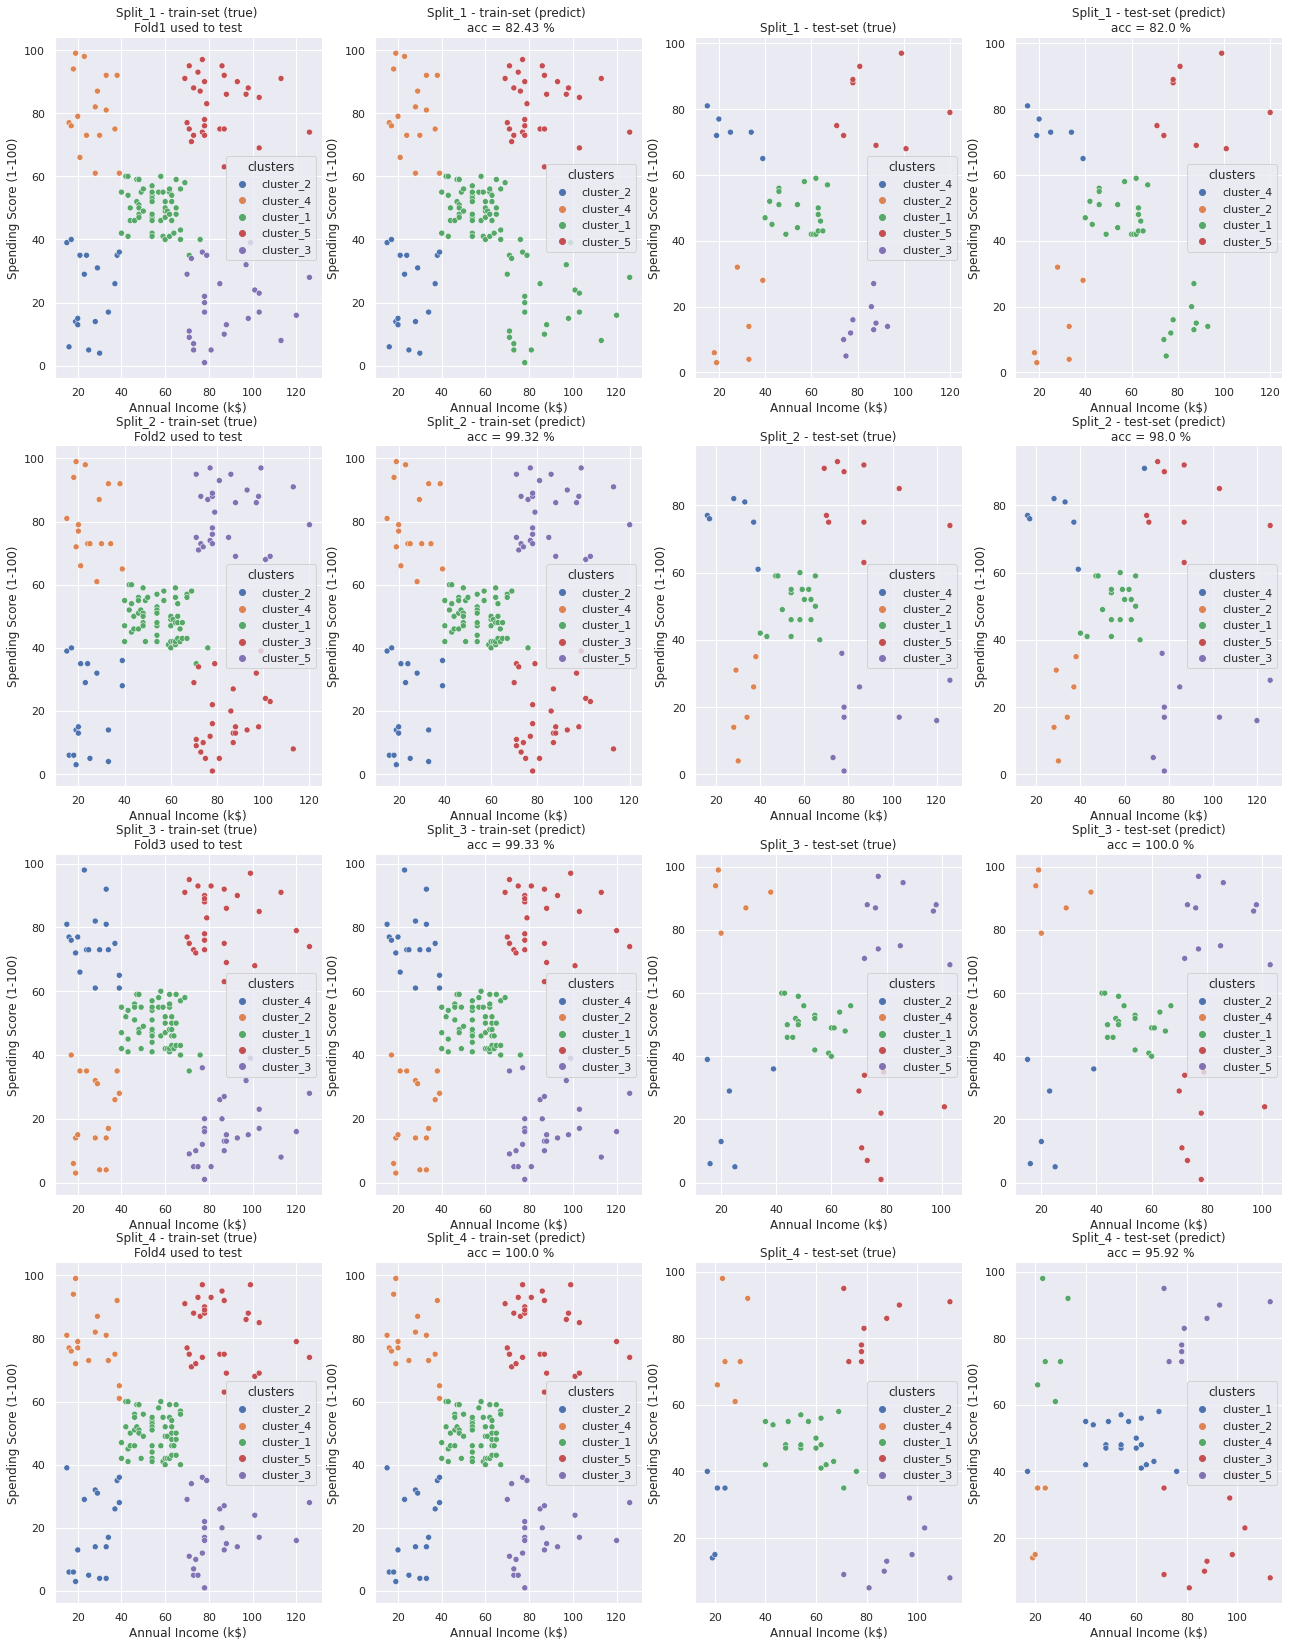

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
clf = AdaBoostClassifier()
grid_params = {
              'n_estimators': [100, 150, 200],
              'learning_rate' : [1e-2,1, 1e-1,1e-3]
             }
df = dvn_c.k_Fold_Best_params_show_all_(df_add_label.drop(columns = ['Gender', 'CustomerID']), 
                                         4, clf, grid_params, 
                                         'clusters', x_name = 'Annual Income (k$)',
                                         y_name = 'Spending Score (1-100)', 
                                         show_all = True)

- All the scores is pretty-good!

#### Grouped-viewing by each clusters

- Clusters 0,1,2,3 have a higher proportion of females than males and cluster 4 has an almost equal proportion of both.

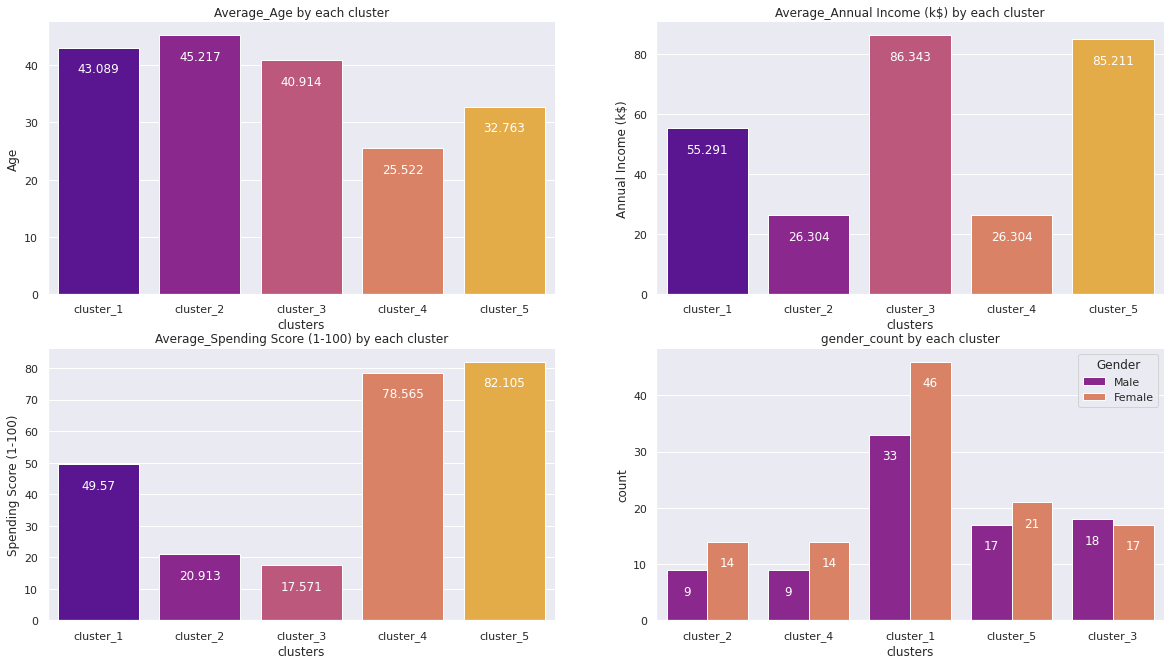

In [12]:
dvn_c.final_market_analytics__type_1_(df_add_label, 'CustomerID', 'Gender')

### Label-naming and Conclusion

1. **Cluster 3**: high annual income, high spending score
The average age is $32,76$ years; predominantly female; Average Annual Income is $85,211$k in dollars; Average Spending Score is $82,105$
2. **Cluster 2**: intermediate annual income, intermediate spending score
The average age is $42,938$ years; predominantly female ($47$); Average Annual Income is $55,088$k in dollars; Average Spending Score is $49,712$
3. **Cluster 1**: low annual income, high spending score
The average age is $25,27$ years; predominantly female; Average Annual Income is $25,727$k in dollars; Average Spending Score is $79,364$
4. **Cluster 5**: low annual income, low spending score
The average age is $45,217$ years; predominantly female; Average Annual Income is $26,304$k in dollars; Average Spending Score is $20,913$
5. **Cluster 4**: high annual income, low spending score
The average age is $40,914$ years; there is an almost equal proportion of males and females; Average Annual Income is $86,343$k in dollars; Average Spending Score is $17,571$.

In [13]:
df.head()

ROC_AUC  accuracy  \
Split_1            1.000000  0.820000   
Split_2            1.000000  0.980000   
Split_3            1.000000  1.000000   
Split_4            0.969899  0.959184   
avg_score_k_split  0.992475  0.939796   

                                                            f1_score  \
Split_1            {'cluster_4': 0.82, 'cluster_2': 1.0, 'cluster...   
Split_2            {'cluster_4': 1.0, 'cluster_2': 1.0, 'cluster_...   
Split_3            {'cluster_2': 1.0, 'cluster_4': 1.0, 'cluster_...   
Split_4            {'cluster_2': 0.95, 'cluster_4': 0.89, 'cluste...   
avg_score_k_split  {'cluster_2': 0.9425, 'cluster_4': 0.9725, 'cl...   

                                                            precison  \
Split_1            {'cluster_4': 0.69, 'cluster_2': 1.0, 'cluster...   
Split_2            {'cluster_4': 1.0, 'cluster_2': 1.0, 'cluster_...   
Split_3            {'cluster_2': 1.0, 'cluster_4': 1.0, 'cluster_...   
Split_4            {'cluster_2': 0.95, 'cluster_4': 1.0, 'cluster...   
avg_score_k_split  {'cluster_2': 0.91, 'cluster_4': 1.0, 'cluster...   

                                                              recall  \
Split_1            {'cluster_4': 1.0, 'cluster_2': 1.0, 'cluster_...   
Split_2            {'cluster_4': 1.0, 'cluster_2': 1.0, 'cluster_...   
Split_3            {'cluster_2': 1.0, 'cluster_4': 1.0, 'cluster_...   
Split_4            {'cluster_2': 0.95, 'cluster_4': 0.8, 'cluster...   
avg_score_k_split  {'cluster_2': 0.9425, 'cluster_4': 0.9725, 'cl...   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.125647           3   
Split_2                           0.157017           3   
Split_3                           0.096606           3   
Split_4                           0.905372           3   
avg_score_k_split                 0.321161           3   

                                                     best_param  
Split_1            {'learning_rate': 0.01, 'n_estimators': 200}  
Split_2            {'learning_rate': 0.01, 'n_estimators': 200}  
Split_3            {'learning_rate': 0.01, 'n_estimators': 200}  
Split_4            {'learning_rate': 0.01, 'n_estimators': 200}  
avg_score_k_split  {'learning_rate': 0.01, 'n_estimators': 200}

### Exercise

In [14]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%202/datasets/customer_data.csv")
customer_df.head()

InvoiceNo StockCode  Quantity       InvoiceDate  UnitPrice  CustomerID  \
0    579301     22645         2  11/29/2011 11:32       1.45     18118.0   
1    574081     23312         4   11/2/2011 16:37       4.15     15804.0   
2    557117     23202        10   6/16/2011 17:04       2.08     14849.0   
3    573096     23568        12  10/27/2011 14:40       1.25     14004.0   
4    557571     22536       192   6/21/2011 10:53       0.27     12830.0   

                           Description         Country  
0  CERAMIC HEART FAIRY CAKE MONEY BANK  United Kingdom  
1          VINTAGE CHRISTMAS GIFT SACK  United Kingdom  
2               JUMBO BAG VINTAGE LEAF  United Kingdom  
3         EGG CUP HENRIETTA HEN CREAM   United Kingdom  
4           MAGIC DRAWING SLATE PURDEY  United Kingdom

In [15]:
dvn_c.table_count_null(customer_df)

InvoiceNo StockCode Quantity InvoiceDate UnitPrice  \
column_type           object    object    int64      object   float64   
cnt_null_data (nb)         0         0        0           0         0   
cnt_null_data (%)        0.0       0.0      0.0         0.0       0.0   

                   CustomerID Description Country  
column_type           float64      object  object  
cnt_null_data (nb)          0           0       0  
cnt_null_data (%)         0.0         0.0     0.0

In [16]:
%time customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

CPU times: user 26.2 s, sys: 31.1 ms, total: 26.2 s
Wall time: 26.2 s


In [17]:
dvn_c.table_count_unique(customer_df)

InvoiceNo StockCode   Quantity  \
column_type             object    object      int64   
cnt_unique (nb)          20851      3612        377   
most_appeared_value   [576339]  [85123A]        [1]   
cnt_occurrences (nb)       377      1356      49089   
cnt_occurrences (%)   0.138311  0.497478  18.009355   

                                          InvoiceDate UnitPrice CustomerID  \
column_type                            datetime64[ns]   float64    float64   
cnt_unique (nb)                                 19327       513       4332   
most_appeared_value   [2011-11-14T15:27:00.000000000]    [1.25]  [17841.0]   
cnt_occurrences (nb)                              377     31261       5321   
cnt_occurrences (%)                          0.138311  11.46877   1.952123   

                                               Description           Country  
column_type                                         object            object  
cnt_unique (nb)                                       3800                37  
most_appeared_value   [WHITE HANGING HEART T-LIGHT HOLDER]  [United Kingdom]  
cnt_occurrences (nb)                                  1351            242530  
cnt_occurrences (%)                               0.495643         88.977346

In [18]:
df = dvn_c.data_duplicate(customer_df)

|****************************************************************************************************
|	The initial_shape of your dataset is (272575, 8)
|----------------------------------------------------------------------------------------------------
|	Number of duplicated-values = 2396, about 0.879024121801339% of initial dataset.
|----------------------------------------------------------------------------------------------------
|	Viewing the first 5 rows.
|****************************************************************************************************


InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    579301     22645         2 2011-11-29 11:32:00       1.45     18118.0   
1    574081     23312         4 2011-11-02 16:37:00       4.15     15804.0   
2    557117     23202        10 2011-06-16 17:04:00       2.08     14849.0   
3    573096     23568        12 2011-10-27 14:40:00       1.25     14004.0   
4    557571     22536       192 2011-06-21 10:53:00       0.27     12830.0   

                           Description         Country  
0  CERAMIC HEART FAIRY CAKE MONEY BANK  United Kingdom  
1          VINTAGE CHRISTMAS GIFT SACK  United Kingdom  
2               JUMBO BAG VINTAGE LEAF  United Kingdom  
3         EGG CUP HENRIETTA HEN CREAM   United Kingdom  
4           MAGIC DRAWING SLATE PURDEY  United Kingdom

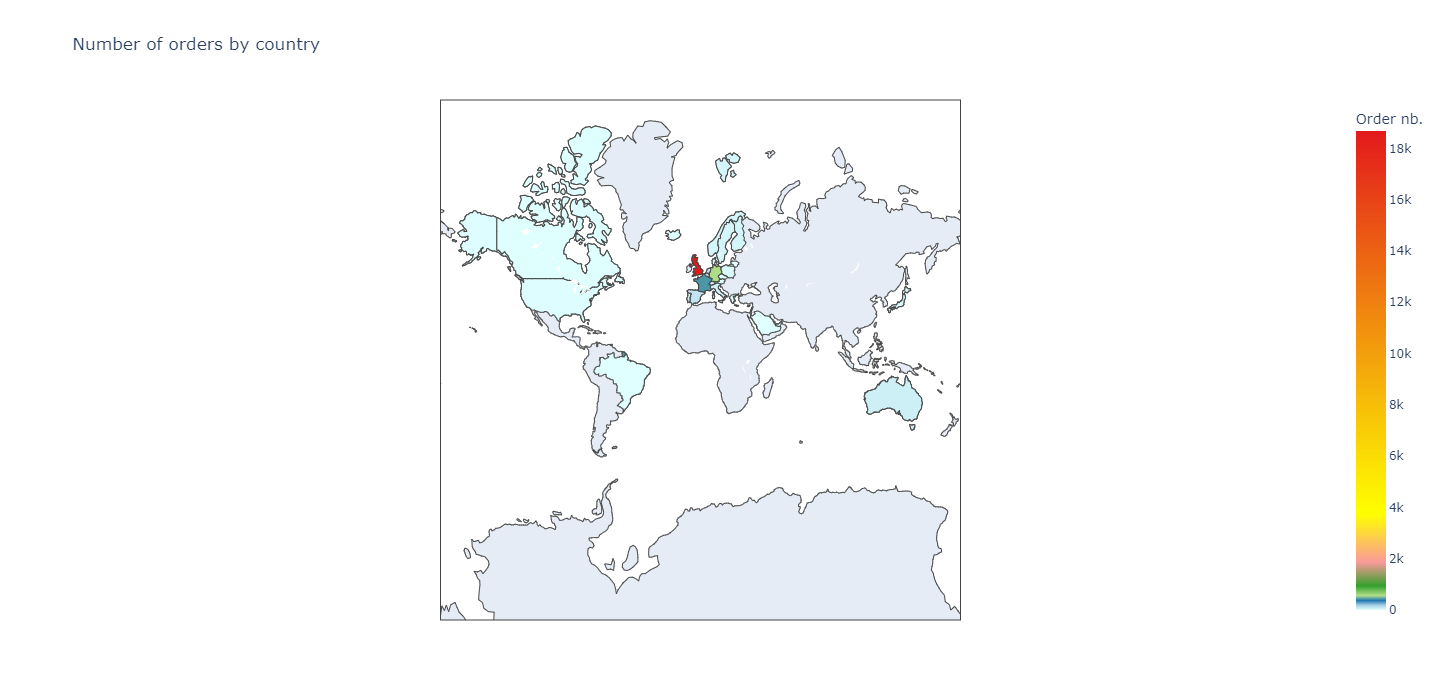

In [19]:
import plotly.graph_objs as go
from plotly.offline import iplot

observed_cols = ['CustomerID', 'InvoiceNo', 'Country']
dvn_c.viewing_by_country(df, observed_cols)

In [20]:
dvn_c.view_top(df, 'StockCode', 'InvoiceNo', 'CustomerID', 'quantity', 'InvoiceDate', 10)

Number of users, transaction and products.


products  transactions  customers
quantity      3612         20851       4332

Number of products purchased in every transaction (to top 10).


CustomerID InvoiceNo  Number of products
0     12346.0   C541433                   1
1     12347.0    537626                  18
2     12347.0    542237                  18
3     12347.0    549222                  18
4     12347.0    556201                  14
5     12347.0    562032                  17
6     12347.0    573511                  28
7     12347.0    581180                   7
8     12348.0    539318                  11
9     12348.0    541998                   5

- TODO
>- Create the clustering model based on the `quantity`, `unit_price`
>- Give the comments and your explainations

In [24]:
# Your code here

In [25]:
# Your code here

In [26]:
# Your code here